In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df_1 = pd.read_csv("/Users/lanceoconnor/Desktop/JohnsHopkins/ANDERSEN_THESIS/projects/gene_annotation/processed_data/1xGenotypeMatrix.98.csv", sep=",")
print(df_1.shape) # 47651 genes, 1631 strains (1632 columns because WBGeneID is included)
# print(df_1.iloc[0:1])
df_2 = pd.read_csv("/Users/lanceoconnor/Desktop/JohnsHopkins/ANDERSEN_THESIS/projects/gene_annotation/processed_data/2xGenotypeMatrix.98.csv", sep=",")
df_3 = pd.read_csv("/Users/lanceoconnor/Desktop/JohnsHopkins/ANDERSEN_THESIS/projects/gene_annotation/processed_data/3xGenotypeMatrix.98.csv", sep=",")
df_4 = pd.read_csv("/Users/lanceoconnor/Desktop/JohnsHopkins/ANDERSEN_THESIS/projects/gene_annotation/processed_data/4xGenotypeMatrix.98.csv", sep=",")
df_5 = pd.read_csv("/Users/lanceoconnor/Desktop/JohnsHopkins/ANDERSEN_THESIS/projects/gene_annotation/processed_data/5xGenotypeMatrix.98.csv", sep=",")

# List of DataFrames
dfs = [df_1, df_2, df_3, df_4, df_5]

# Function to calculate frequency and add a column
def add_frequency_column(df):
    # Calculate the frequency of gene presence across all strains
    df['freq'] = df.iloc[:, 1:].mean(axis=1) #all roaws, skip the first column
    return df

def add_category_column(df):
    df['category'] = 'absent'
    private_threshold = 1 / 1631
    df.loc[df['freq'] == private_threshold, 'category'] = 'private'
    df.loc[(df['freq'] > private_threshold) & (df['freq'] <= 0.05), 'category'] = 'rare'
    df.loc[(df['freq'] > 0.05) & (df['freq'] < 0.95), 'category'] = 'soft-core'
    df.loc[(df['freq'] >= 0.95) & (df['freq'] <= 1.0), 'category'] = 'core'
    return df

dfs = [add_frequency_column(df) for df in dfs]
dfs = [add_category_column(df) for df in dfs]

# for i,df in enumerate (dfs, start=1):
#     print(f"Dataframe {i} with freq and cat columns:")
#     print(df.iloc[:3, list(range(2)) + list(range(-2, 0))])


(47651, 1632)
Dataframe 1 with freq and cat columns:
         WBGeneID  AB1      freq category
0  WBGene00023193    1  0.999387     core
1  WBGene00022277    1  0.995708     core
2  WBGene00022276    1  0.992029     core
Dataframe 2 with freq and cat columns:
         WBGeneID  AB1      freq category
0  WBGene00023193    1  0.998161     core
1  WBGene00022277    1  0.982219     core
2  WBGene00022276    1  0.990803     core
Dataframe 3 with freq and cat columns:
         WBGeneID  AB1      freq category
0  WBGene00023193    1  0.997548     core
1  WBGene00022277    1  0.961373     core
2  WBGene00022276    1  0.986511     core
Dataframe 4 with freq and cat columns:
         WBGeneID  AB1      freq   category
0  WBGene00023193    1  0.993869       core
1  WBGene00022277    1  0.925812  soft-core
2  WBGene00022276    1  0.980380       core
Dataframe 5 with freq and cat columns:
         WBGeneID  AB1      freq   category
0  WBGene00023193    1  0.992029       core
1  WBGene00022277    1 

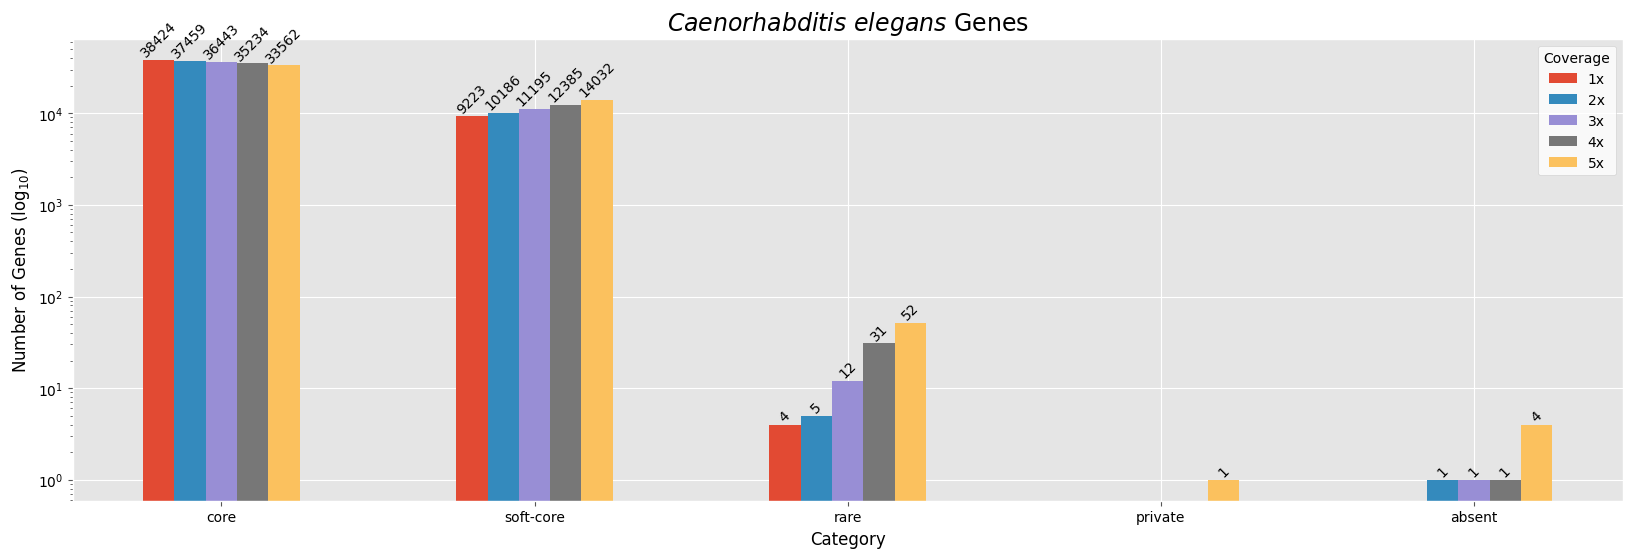

In [19]:
# plot the count of core, soft-core, rare, and private genes for each coverage threshold cutoff
plt.style.use("ggplot")
# cmap = plt.get_cmap('nipy_spectral')

coverage_labels = ['1x', '2x', '3x', '4x', '5x']
categories = ['core', 'soft-core', 'rare', 'private', 'absent']
category_counts = []

for df in dfs:
    category_counts.append(df['category'].value_counts().reindex(categories, fill_value=0)) # incase there are no "private" genes, then fill with a zero

category_counts_df = pd.DataFrame(category_counts, index=coverage_labels)

fig, ax = plt.subplots(figsize=(20, 6))
bar_width = 0.1
index = np.arange(len(categories))

for i, coverage in enumerate(coverage_labels):
    bars = plt.bar(index + i * bar_width, category_counts_df.loc[coverage], bar_width, label=coverage)
    for bar in bars:
        height = bar.get_height()
        if height > 0:  
            plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', rotation=45)

plt.xlabel('Category', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.yscale('log')
plt.ylabel(r'Number of Genes (log$_{10}$)', color = 'black')
plt.title(r'$\mathbf{\it{Caenorhabditis\ elegans}}$ Genes', color='black', size = 17)
plt.xticks(index + bar_width * 2, categories)
plt.legend(title='Coverage', loc = 'upper right', facecolor = 'white')
# plt.savefig("/Users/lanceoconnor/Desktop/JohnsHopkins/ANDERSEN_THESIS/projects/gene_annotation/plots/GeneCategorizationCount.png", dpi = 900)
plt.show()

In [ ]:

#### EXTRACTING PRIVATE AND ABSENT AND ASSESSING CATEGORIZATION ####
for i, df in enumerate(dfs, start=1):
    # Filter rows where 'category' is 'private'
    private_genes = df[df['category'] == 'private']
    
    if not private_genes.empty:
        # Get the first column, last two columns, and columns with a value of 1
        cols_with_value_1 = private_genes.loc[:, (private_genes == 1).any()]
        selected_columns = pd.concat(
            [private_genes.iloc[:, [0]], private_genes.iloc[:, -2:], cols_with_value_1],
            axis=1
        ).drop_duplicates()  # Drop duplicate columns if any
        print(f"DataFrame {i} - Private Gene(s):")
        print(selected_columns)
    else:
        print(f"DataFrame {i} - No private genes found.")



for i, df in enumerate(dfs, start=1):
    absent_genes = df[df['category'] == 'absent']
    
    if not absent_genes.empty:
        print(f"DataFrame {i} - Absent Gene(s):")
        print(absent_genes.iloc[:3, list(range(2)) + list(range(-4, 0))])    
    else:
        print(f"DataFrame {i} - No Absent genes found.")


for i, df in enumerate(dfs, start=1):
    print(f"DataFrame {i}:")
    print(df['category'].value_counts())
    if df['category'].isna().any():
        print(f"DataFrame {i} has uncategorized rows:")
        print(df[df['category'].isna()])


DataFrame 1 - No private genes found.
DataFrame 2 - No private genes found.
DataFrame 3 - No private genes found.
DataFrame 4 - No private genes found.
DataFrame 5 - Private Gene(s):
             WBGeneID category  count  ECA922  count
43689  WBGene00002976  private      1       1      1
DataFrame 1 - No Absent genes found.
DataFrame 2 - Absent Gene(s):
            WBGeneID  AB1  XZ2213  freq category  count
4545  WBGene00005324    0       0   0.0   absent      0
DataFrame 3 - Absent Gene(s):
            WBGeneID  AB1  XZ2213  freq category  count
4545  WBGene00005324    0       0   0.0   absent      0
DataFrame 4 - Absent Gene(s):
            WBGeneID  AB1  XZ2213  freq category  count
4545  WBGene00005324    0       0   0.0   absent      0
DataFrame 5 - Absent Gene(s):
             WBGeneID  AB1  XZ2213  freq category  count
1079   WBGene00044809    0       0   0.0   absent      0
4545   WBGene00005324    0       0   0.0   absent      0
13929  WBGene00235287    0       0   0.0   abse

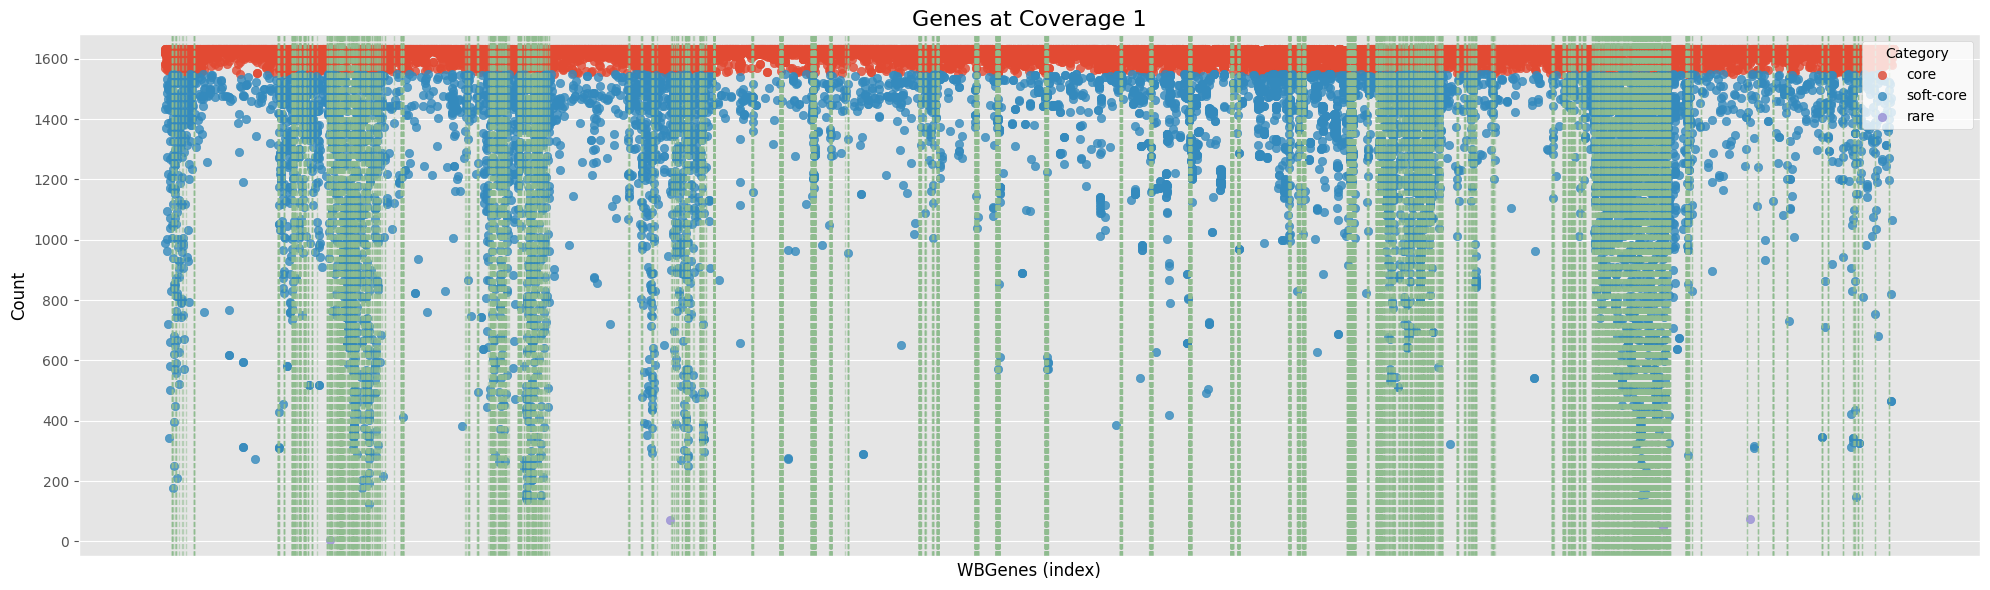

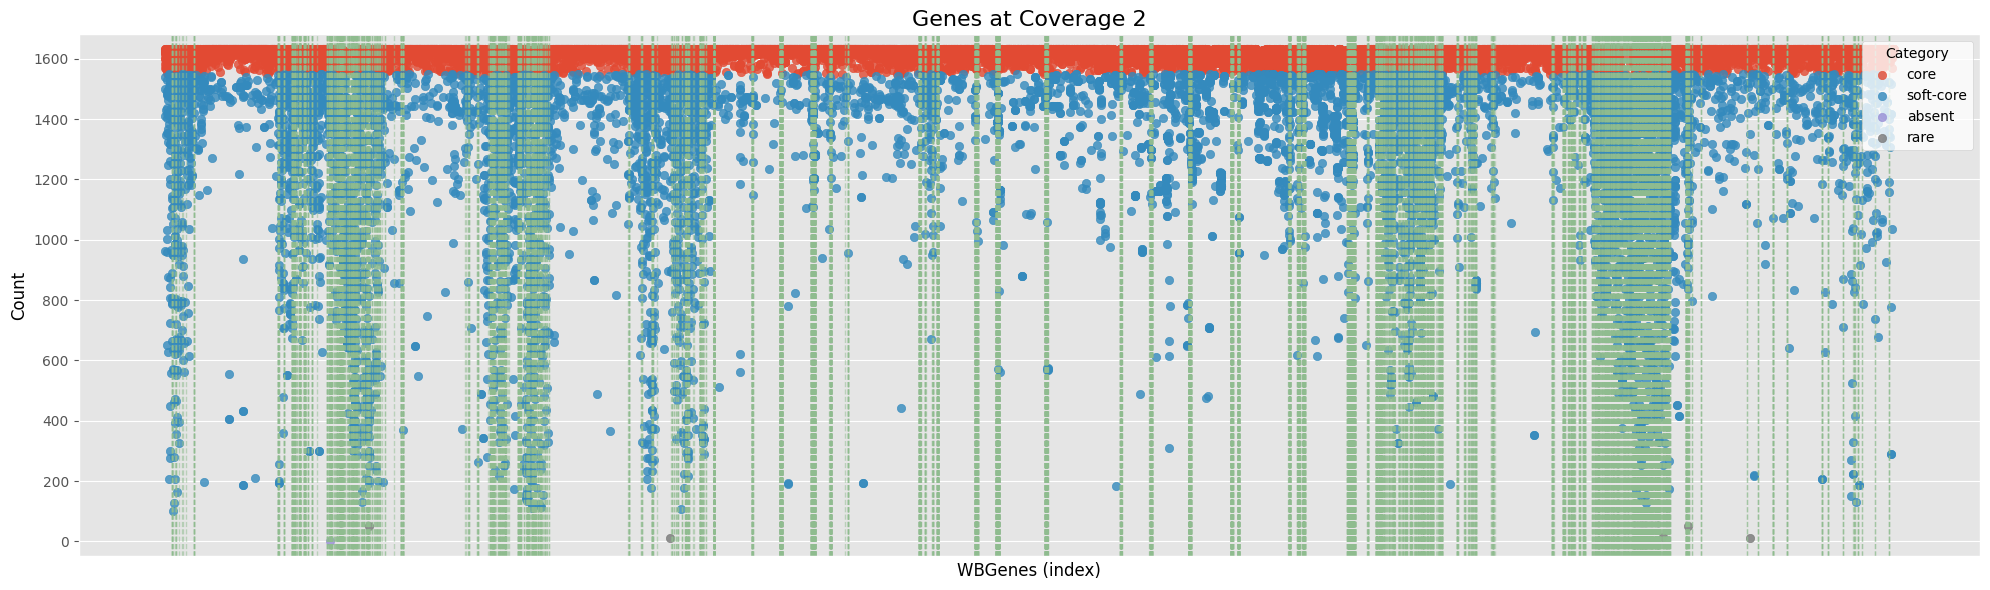

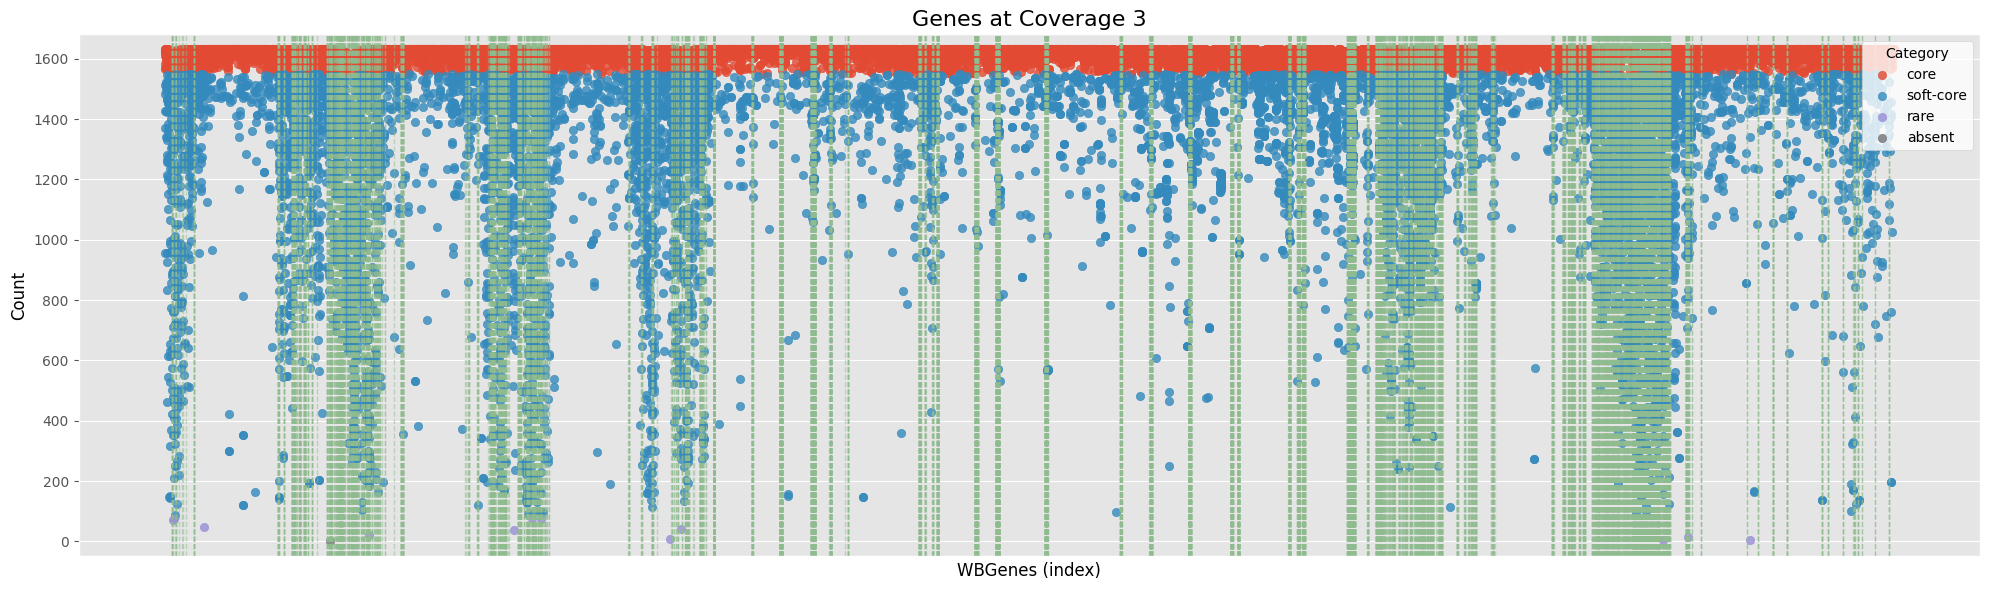

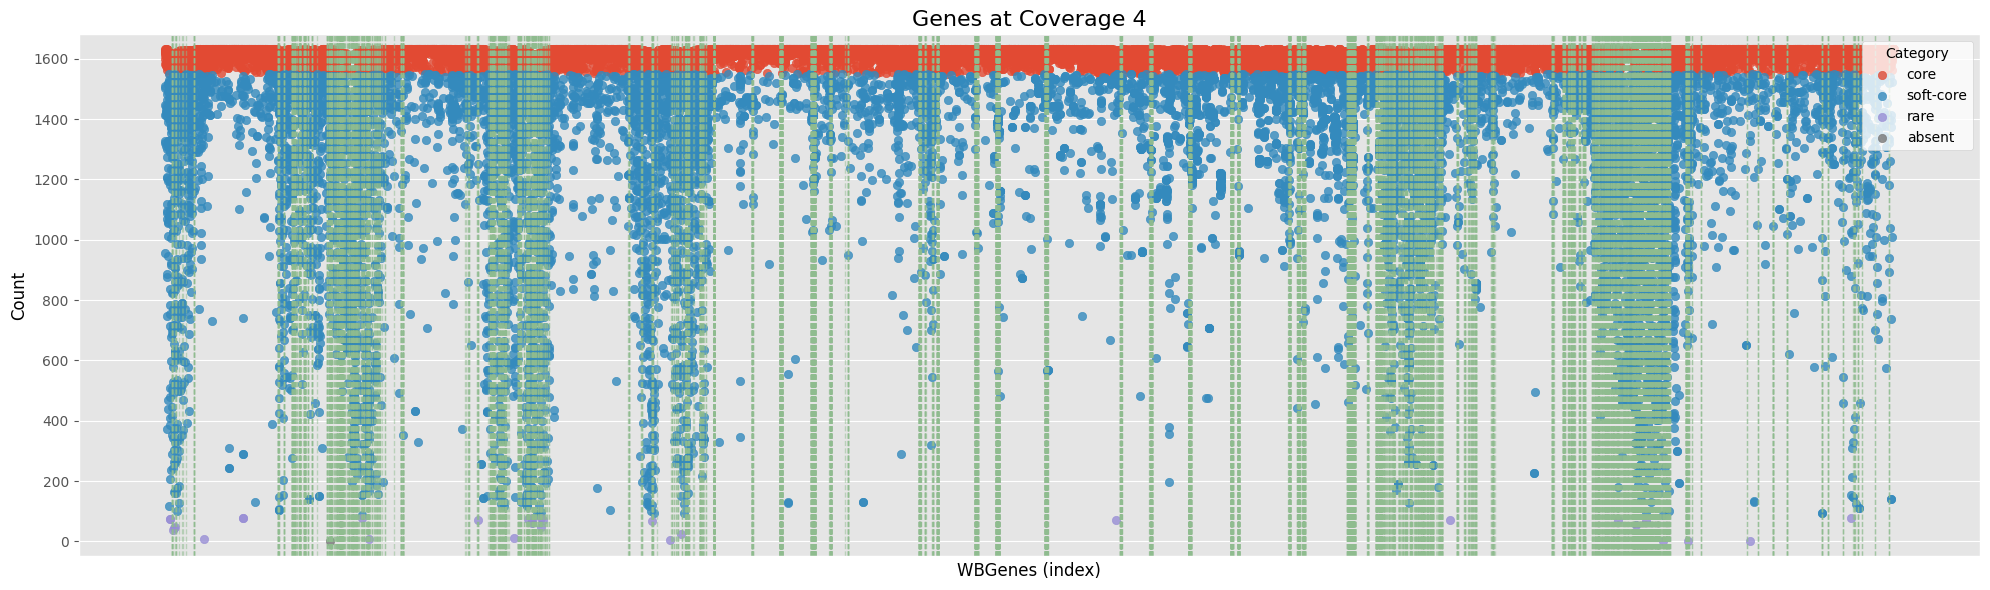

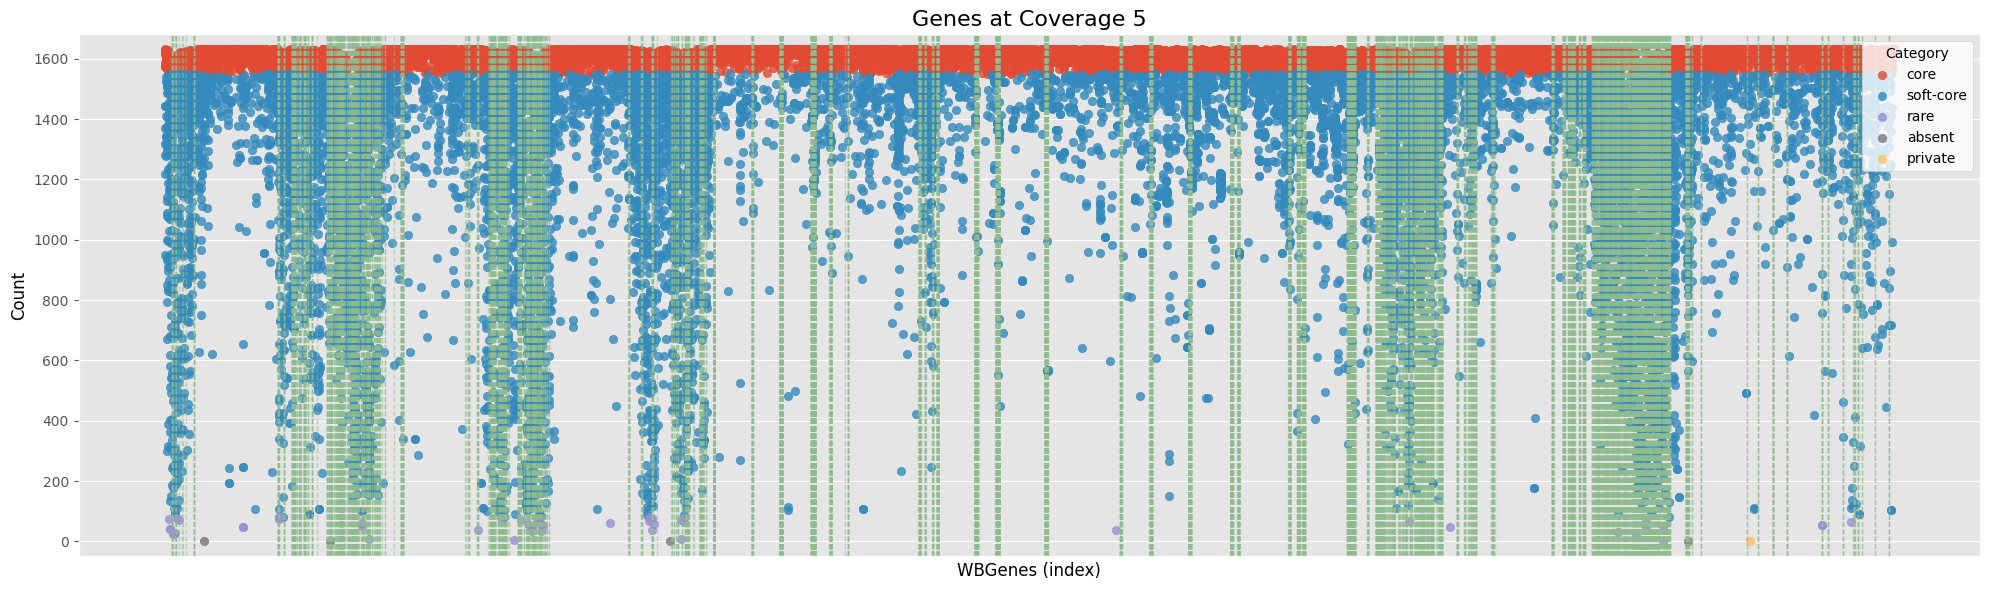

In [31]:
# plot the frequency of strains having gene X and if it falls in a HDR or not 
hdr_gene_regions = pd.read_csv("/Users/lanceoconnor/Desktop/JohnsHopkins/ANDERSEN_THESIS/projects/gene_annotation/refGenes_HDRresolution.bed", sep="\t", header = None)
hdr_header = ['CHROM', 'START', 'END', 'WBGeneID', 'InHDR']
hdr_gene_regions.columns = hdr_header
# print(hdr_gene_regions.iloc[:10])



def add_gene_count(df):
    # Calculate the frequency of gene presence across all strains
    df['count'] = df.iloc[:, 1:-3].sum(axis=1) #all roaws, skip the first column
    return df

dfs = [add_gene_count(df) for df in dfs]

# for i,df in enumerate (dfs, start=1):
#     print(f"Dataframe {i} with freq and cat columns:")
#     print(df.iloc[:3, list(range(2)) + list(range(-4, 0))])


HDRres_dfs = []
for i, df in enumerate(dfs, start=1):
    # Merge with HDR data on WBGeneID
    df = df.merge(hdr_gene_regions[["WBGeneID", "InHDR"]], on="WBGeneID", how="left")
    HDRres_dfs.append(df)

# for i,df in enumerate (HDRres_dfs, start=1):
#     print(f"Dataframe {i} with freq and cat columns:")
#     print(df.iloc[:3, list(range(2)) + list(range(-4, 0))])


HDRres_dfs 
coverage_labels = ["Coverage 1", "Coverage 2", "Coverage 3", "Coverage 4", "Coverage 5"]



plt.style.use("ggplot")

for i, df in enumerate(HDRres_dfs):
    fig, ax = plt.subplots(figsize=(20, 6))
    
    hdr_genes = df[df['InHDR'] == 1]
    for idx in hdr_genes.index:
        ax.axvline(x=idx, color='darkseagreen', linestyle='--', linewidth=1, alpha=0.5)

    categories = df['category'].unique()
    for category in categories:
        subset = df[df['category'] == category]
        ax.scatter(
            subset.index, subset['count'], label=category, alpha=0.8
        )
    
    ax.set_xlabel('WBGenes (index)', color='black', fontsize=12)
    ax.set_xticks([])
    # ax.set_xlim(-100,47751)
    ax.set_ylim(-50,1681)
    ax.set_ylabel('Count', color='black', fontsize=12)
    ax.set_title(f'Genes at {coverage_labels[i]}', fontsize=16, color='black')
    ax.tick_params(axis='x', labelsize=10, labelrotation=90)
    ax.tick_params(axis='y', labelsize=10)
    ax.legend(title='Category', loc='upper right', facecolor='white')

    plt.tight_layout()
    # plt.savefig(f"/Users/lanceoconnor/Desktop/JohnsHopkins/ANDERSEN_THESIS/projects/gene_annotation/plots/HDR_geneCount.{coverage_labels[i]}x.png", dpi = 900)
    plt.show()